In [4]:
# Manipulación y procesamiento de Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Plot - Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


# Definir el tamano del grafico
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# No presentar advertencia
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Cargar los datos

Los datos

se requiere installar

`pip install openpyxl`

In [5]:
data = pd.read_excel("./siniestro_info_mercado_ecuador.xlsx")
data

,fecha,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais,feriados_dias
0,2015-01-01,11414.73670,21737.34840,0.525121,101.324349,304.830000,933.903226,1
1,2015-02-01,23993.22800,42846.63945,0.559979,102.423237,251.570000,778.035714,1
2,2015-03-01,36434.26000,65937.44000,0.552558,102.965220,400.650000,799.516129,0
3,2015-04-01,51390.63183,90600.17140,0.567224,104.718928,386.070000,782.733333,1
4,2015-05-01,65844.30084,116942.80600,0.563047,104.820214,352.840000,670.548387,1
...,...,...,...,...,...,...,...,...
122,2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894,1502.129032,1
123,2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651,1418.900000,1
124,2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194,1083.451613,1
125,2025-06-01,102555.13100,187168.38900,0.547930,120.943609,188.859993,896.833333,0


In [6]:
# Dummy COVID (mar–jun 2020)
data["covid_dummy"] = 0
data.loc[(data["fecha"] >= np.datetime64("2020-04")) & (data["fecha"] <= np.datetime64("2020-12")), "covid_dummy"] = 1


In [7]:
data["covid_dummy"].unique()

array([0, 1], dtype=int64)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                127 non-null    datetime64[ns]
 1   costo_siniestros     127 non-null    float64       
 2   prima_nrd            127 non-null    float64       
 3   tasa_siniestralidad  127 non-null    float64       
 4   ipc_transporte       127 non-null    float64       
 5   precipitacion        127 non-null    float64       
 6   riesgo_pais          127 non-null    float64       
 7   feriados_dias        127 non-null    int64         
 8   covid_dummy          127 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 9.1 KB


In [9]:
data.describe(include= ["float"])

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,107501.865395,185720.299564,0.583553,111.421945,263.742320,1148.505515
std,60335.790260,101335.201147,0.074454,6.651050,92.285715,708.258158
min,11414.736700,21737.348400,0.370849,101.324349,100.265301,452.064516
25%,55405.010880,94108.042495,0.548030,105.947461,192.714233,711.998387
50%,102555.131000,185032.355380,0.572426,108.058350,251.570000,910.548387
75%,152936.097860,272760.862140,0.622095,119.097500,323.205000,1336.790323
max,254135.702000,378035.360100,0.741119,123.161211,506.020000,5075.107143


In [10]:
data.columns

Index(['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy'],
      dtype='object')

In [11]:
dark_style = {
    'axes.facecolor': "#AB915E", # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7", "#f3f3af",  "#c0ebe9"
    'axes.grid': True,}  
plt.rcParams.update(dark_style)

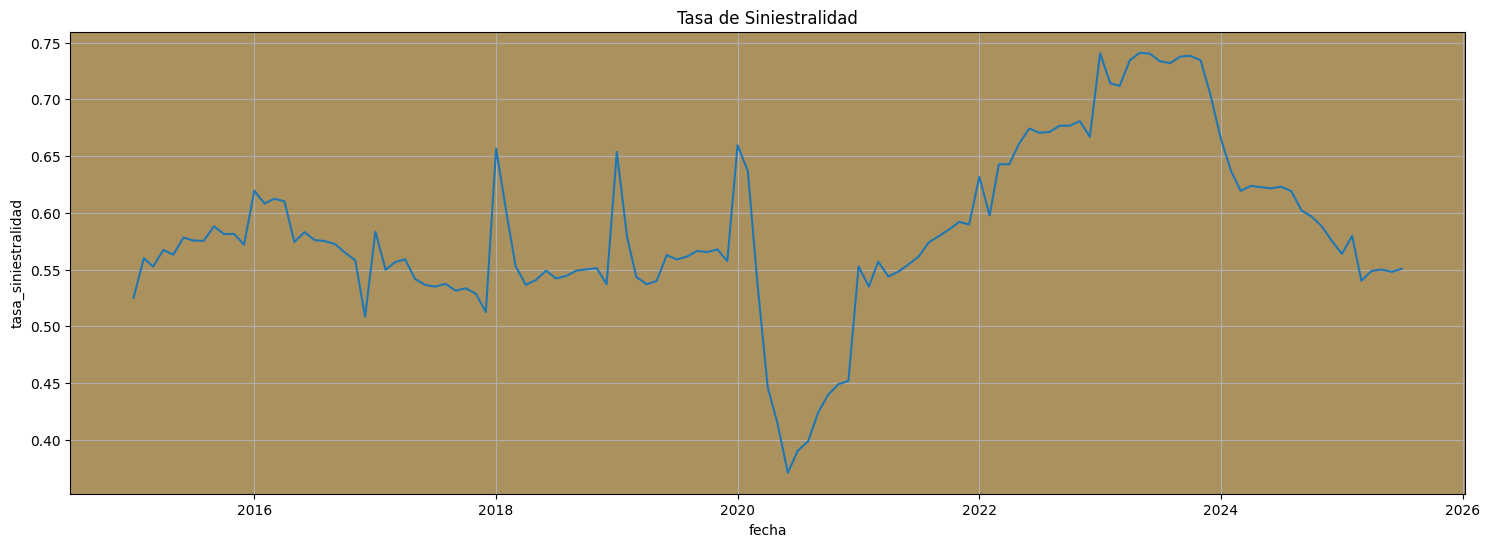

In [12]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='fecha', y = 'tasa_siniestralidad', data = data, )
plt.title('Tasa de Siniestralidad')
#plt.grid()
plt.show()

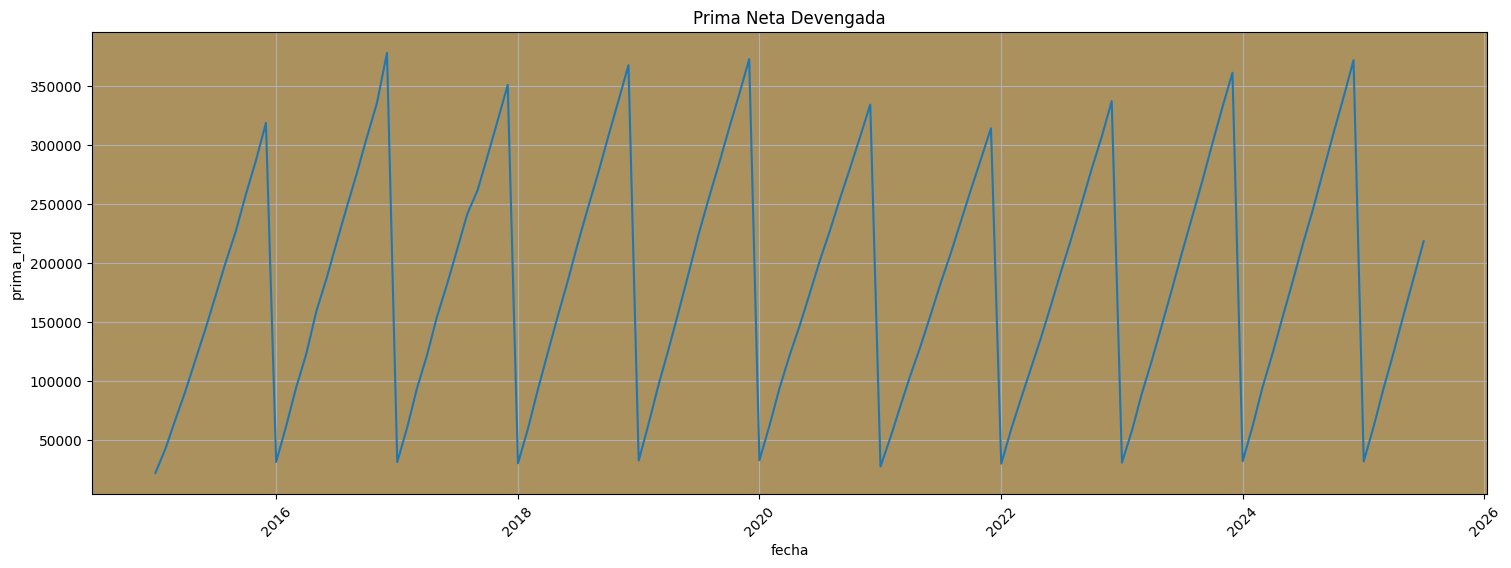

In [13]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='fecha', y = 'prima_nrd', data = data)
plt.title('Prima Neta Devengada')
plt.xticks(rotation=45)
plt.show()

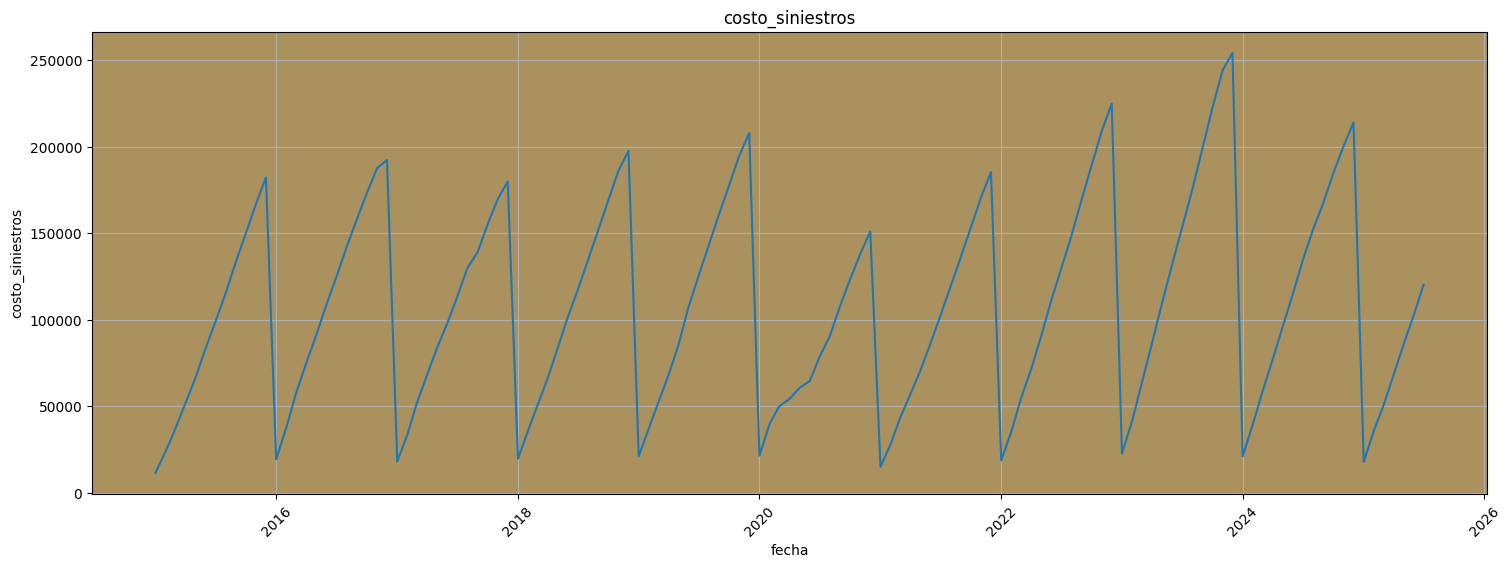

In [14]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='fecha', y = 'costo_siniestros', data = data)
plt.title('costo_siniestros')
plt.xticks(rotation=45)
plt.show()


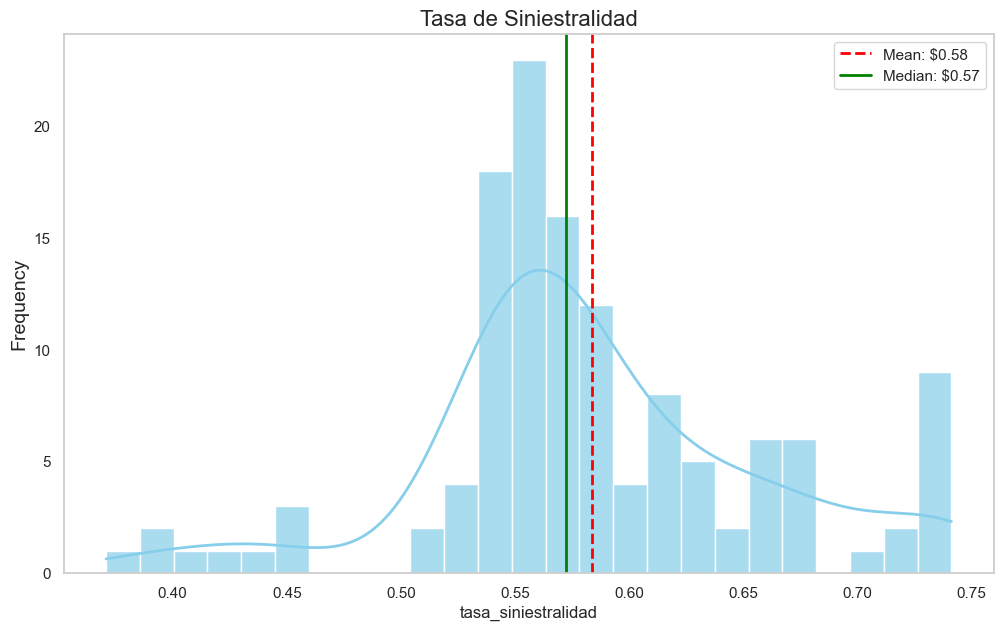

In [15]:
# Setting up the seaborn style
sns.set(style="whitegrid")

# Histogram for the 'price' variable
plt.figure(figsize=(12, 7))
sns.histplot(data["tasa_siniestralidad"], kde=True, color='skyblue', bins=25, alpha=0.7, line_kws={'linewidth': 2, 'color': 'blue'})
plt.title('Tasa de Siniestralidad', fontsize=16)
#plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding mean and median lines
mean_price = data["tasa_siniestralidad"].mean()
median_price = data["tasa_siniestralidad"].median()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', linewidth=2, label=f'Median: ${median_price:.2f}')

# Adding a legend
plt.legend()
plt.grid(False)

# Displaying the plot
plt.show()

In [16]:
data['Day'] = data['fecha'].dt.day_name().astype('category')
data['Month'] = data['fecha'].dt.month_name().astype('category')

In [17]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day'] = pd.Categorical(data['Day'], categories=day_ordered, ordered=True)

month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

data['Month'] = pd.Categorical(data['Month'], categories=month_ordered, ordered=True)

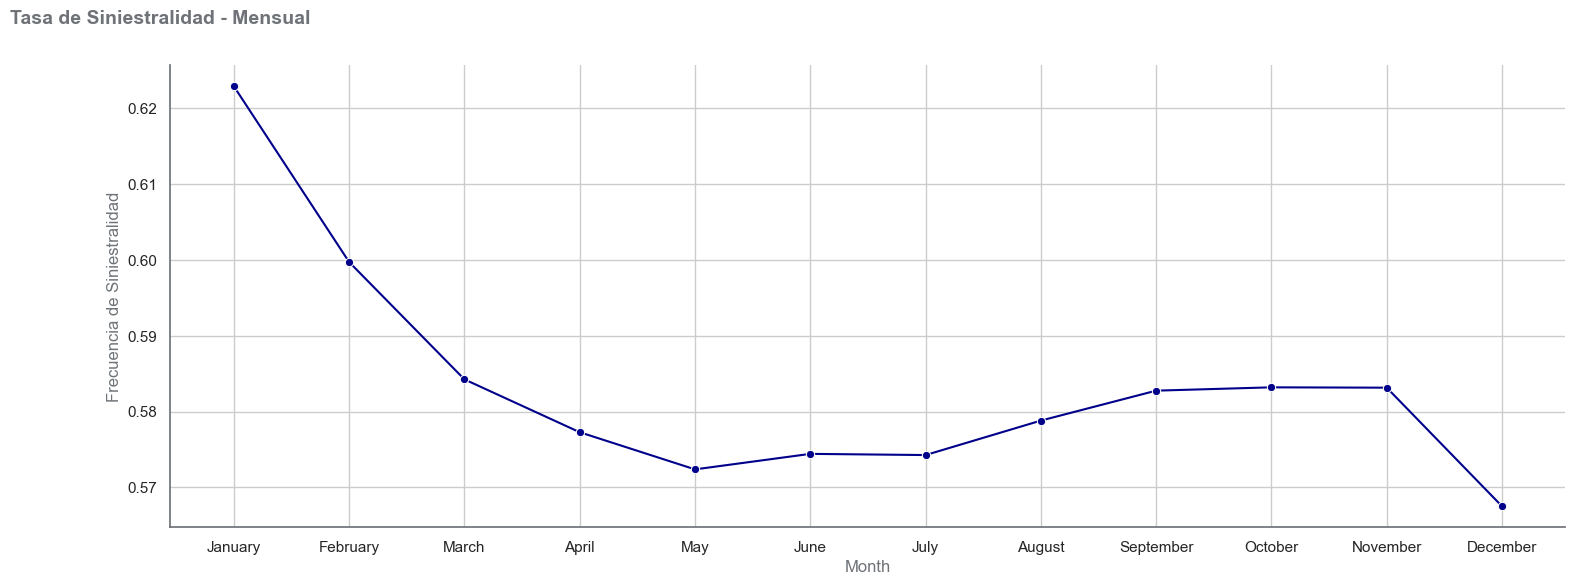

In [18]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Plot the sales trend across the date
sns.lineplot(x = 'Month', y = 'tasa_siniestralidad', data = data, ci=None, marker='o', color='darkblue', ax=ax)

# Despine the right side
sns.despine(right=True)

# Set the label
ax.set_xlabel('Month', color='#6F7378')
ax.set_ylabel('Frecuencia de Siniestralidad', color='#6F7478')

# Change the spine color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Set the title
ax.set_title('Tasa de Siniestralidad - Mensual', weight='bold', pad=30, size=14, x=-0.115,
             color='#6F7378', ha='left') 

# Change tick color
ax.tick_params(color='#6F7378')

plt.show()

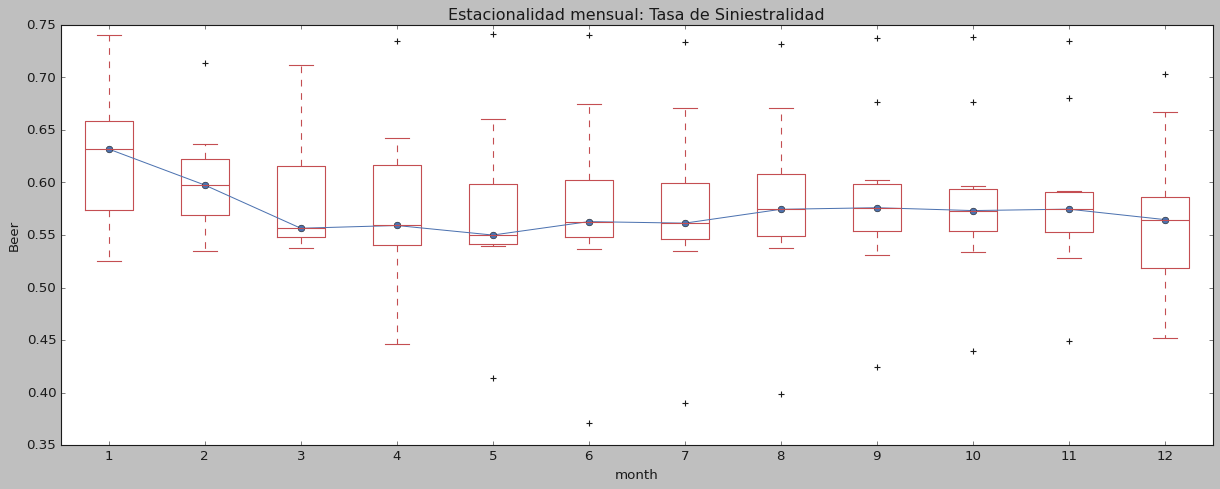

In [19]:
# Boxplot graph for monthly seasonality
# ==============================================================================
df1 = data.copy()
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(18, 7))
df1['month'] = df1['fecha'].apply(lambda x: x.month)
df1.boxplot(column = 'tasa_siniestralidad', by='month', ax=ax, color="red")
df1.groupby('month')["tasa_siniestralidad"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Beer')
ax.set_title('Estacionalidad mensual: Tasa de Siniestralidad')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

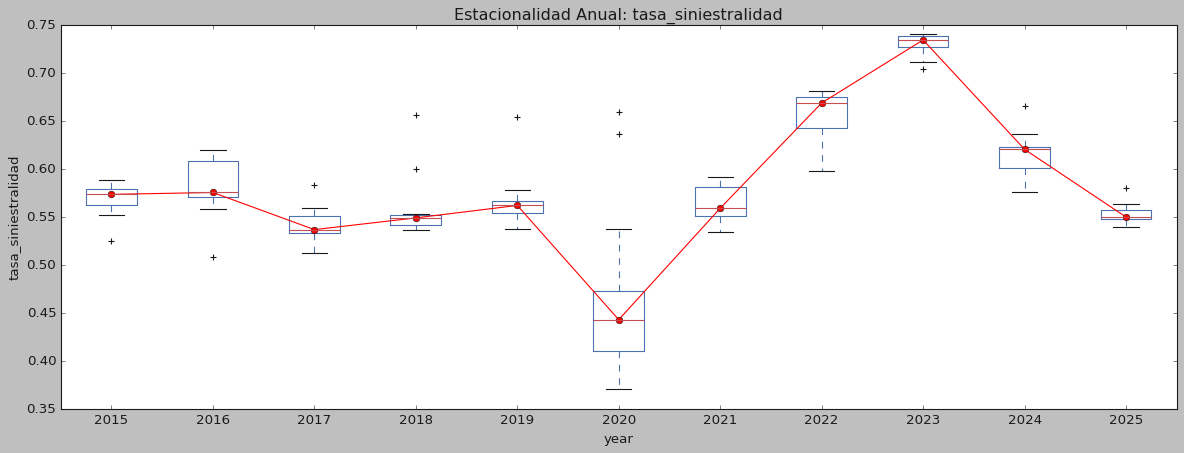

In [20]:
# Boxplot graph for annual seasonality
# ==============================================================================
# Extract year component from date
df1['year'] = data['fecha'].dt.year

# Create a dictionary to store the data for each year
data_anual = {}
for year in df1['year'].unique():
    data_anual[year] = df1.loc[df1['year'] == year, 'tasa_siniestralidad'].values

# Create a data list for the Boxplot chart
boxplot_data = [data_anual[year] for year in sorted(data_anual.keys())]

# Create the Boxplot chart
plt.figure(figsize=(18, 6))
plt.boxplot(boxplot_data, labels=sorted(data_anual.keys()))
plt.xlabel('year')
plt.ylabel('tasa_siniestralidad')
plt.title('Estacionalidad Anual: tasa_siniestralidad')

# Add the median line graph
medians = [np.median(data_anual[year]) for year in sorted(data_anual.keys())]
plt.plot(range(1, len(medians) + 1), medians, marker='o', color='red', linestyle='-')

plt.show()

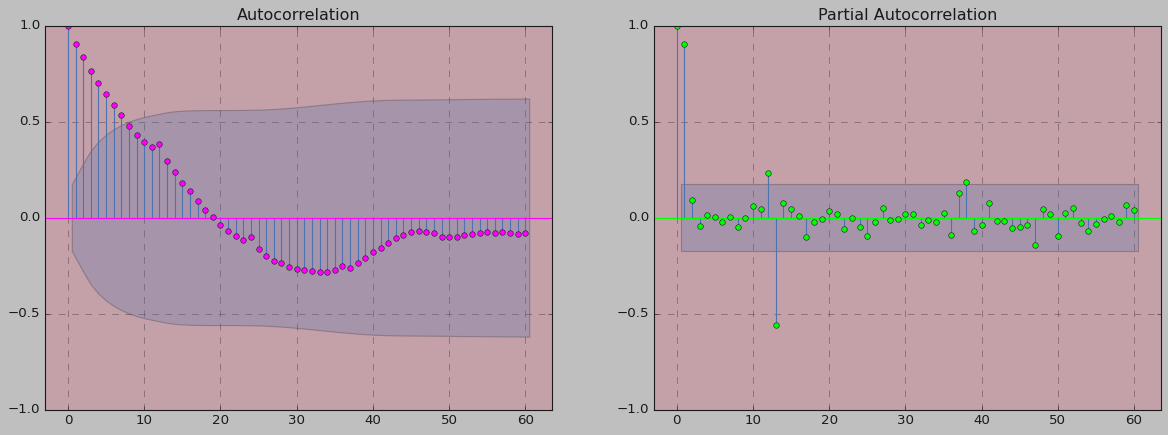

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))

# Cambiar fondo de cada subplot
for ax in axs.flat:
    ax.set_facecolor("#C4A0A9")  # color amarillo claro
    ax.grid(True, linestyle='--', alpha=0.6)  # grilla activada
    ax.set_axisbelow(True)                   # Grilla detrás de los datos

plot_acf(data["tasa_siniestralidad"],  lags = 60, ax = axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(data["tasa_siniestralidad"],  lags = 60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

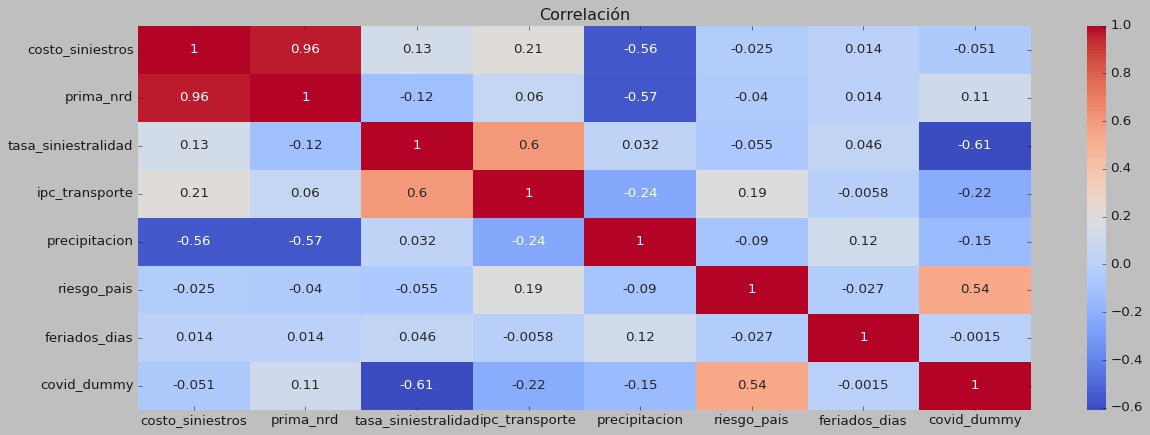

In [22]:
plt.figure(figsize= (18,6))
sns.heatmap(data.corr(numeric_only= True),annot=True, cmap="coolwarm")
plt.title("Correlación")
plt.show()

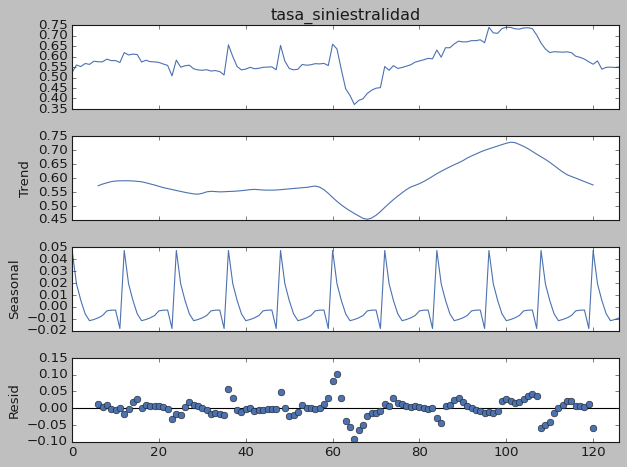

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose 
add = seasonal_decompose(data["tasa_siniestralidad"], model = "add", period = 12)
add.plot();

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Prueba Dickey Fuller
from statsmodels.tsa.stattools import adfuller
from numpy import log
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05: # P - Values
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [25]:
Augmented_Dickey_Fuller_Test_func(data["tasa_siniestralidad"],"Tasa de Siniestralidad")

Resultados de la prueba de Dickey-Fuller para columna: Tasa de Siniestralidad
Test Statistic                         -2.134663
p-value                                 0.230807
No Lags Used                           13.000000
Número de observaciones utilizadas    113.000000
Critical Value (1%)                    -3.489590
Critical Value (5%)                    -2.887477
Critical Value (10%)                   -2.580604
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [26]:
Augmented_Dickey_Fuller_Test_func(data["tasa_siniestralidad"].diff().dropna(),"Tasa de Siniestralidad")

Resultados de la prueba de Dickey-Fuller para columna: Tasa de Siniestralidad
Test Statistic                         -2.609637
p-value                                 0.091022
No Lags Used                           12.000000
Número de observaciones utilizadas    113.000000
Critical Value (1%)                    -3.489590
Critical Value (5%)                    -2.887477
Critical Value (10%)                   -2.580604
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [27]:
Augmented_Dickey_Fuller_Test_func(data["tasa_siniestralidad"].diff().diff().dropna(),"Tasa de Siniestralidad")

Resultados de la prueba de Dickey-Fuller para columna: Tasa de Siniestralidad
Test Statistic                       -5.747776e+00
p-value                               6.064922e-07
No Lags Used                          1.100000e+01
Número de observaciones utilizadas    1.130000e+02
Critical Value (1%)                  -3.489590e+00
Critical Value (5%)                  -2.887477e+00
Critical Value (10%)                 -2.580604e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [28]:
def tsplot(y, lags=None, figsize=(18, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

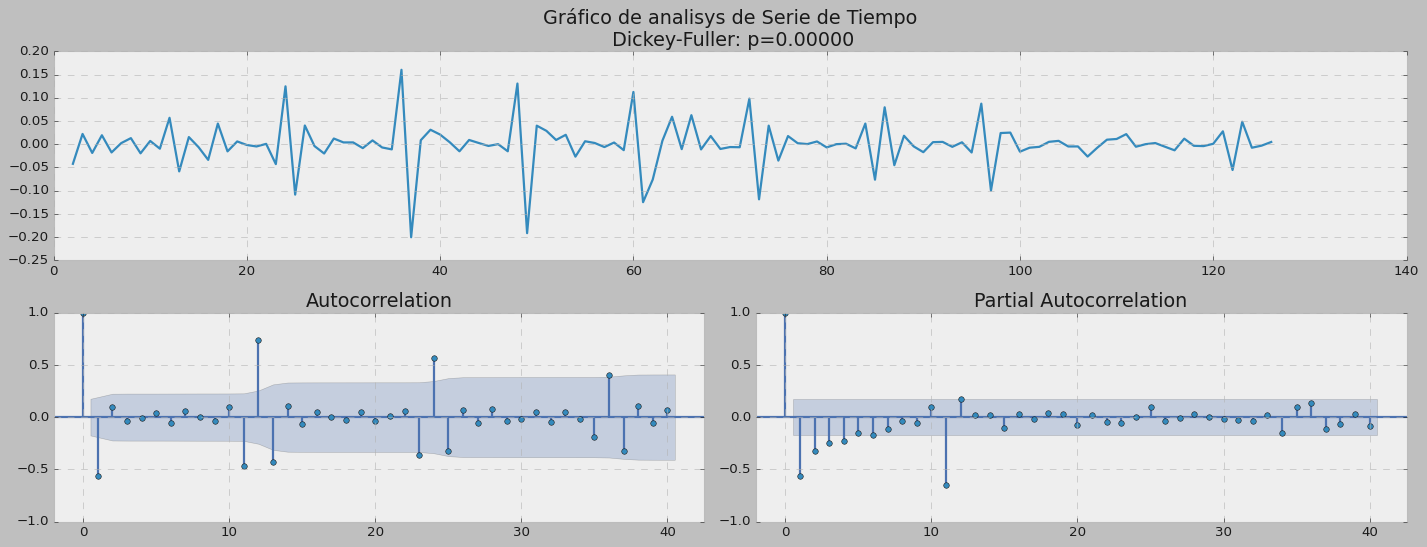

In [29]:
tsplot(data["tasa_siniestralidad"].diff().diff().dropna(), lags = 40);

Necesitamos conocer los terminos de los modelo AR y del modelo MA:

- Para el modelo AR, necesitamos visualizar el grafico PACF.

- Para el modelo MA, necesitamos visualizar el grafico de ACF.

## `GridSearch del Modelo ARIMA`

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Supongamos que tienes una serie temporal llamada 'y'
# y = tu_serie_temporal

# Rango de valores para p y q
p_range = range(0, 5)
q_range = range(0, 5)

# Guardar resultados
resultados = []

for p in p_range:
    for q in q_range:
        if p == 0 and q == 0:
            continue  # ARMA(0,0) no tiene sentido
        try:
            modelo = ARIMA(data["tasa_siniestralidad"], order=(p, 2, q))
            resultado = modelo.fit()
            resultados.append({
                'p': p,
                'i': 2,
                'q': q,
                'AIC': resultado.aic,
                'BIC': resultado.bic
            })
        except:
            continue

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

In [31]:
# Ordenar por AIC
print("Top modelos por AIC:")
print(df_resultados.sort_values('AIC').head())

# Ordenar por BIC
print("\nTop modelos por BIC:")
print(df_resultados.sort_values('BIC').head())

Top modelos por AIC:
    p  i  q         AIC         BIC
12  2  2  3 -500.345976 -483.376094
13  2  2  4 -498.751024 -478.952828
6   1  2  2 -497.696031 -486.382776
0   0  2  1 -497.259647 -491.603019
5   1  2  1 -496.968482 -488.483540

Top modelos por BIC:
    p  i  q         AIC         BIC
0   0  2  1 -497.259647 -491.603019
5   1  2  1 -496.968482 -488.483540
1   0  2  2 -496.920845 -488.435904
6   1  2  2 -497.696031 -486.382776
10  2  2  1 -494.987670 -483.674415


ARIMA(p, i, q)

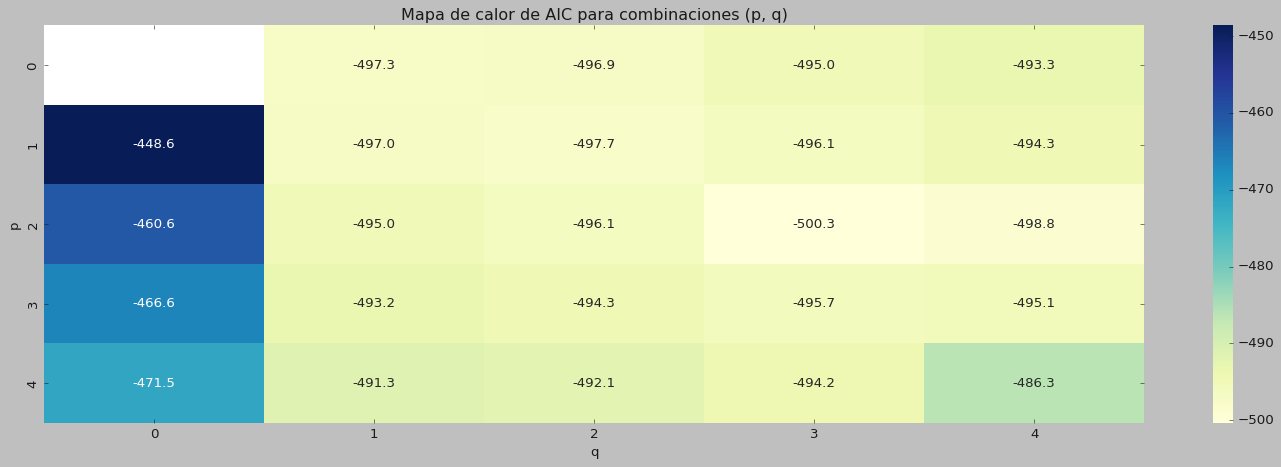

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df_resultados.pivot(index='p', columns='q', values='AIC')
plt.figure(figsize=(18, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Mapa de calor de AIC para combinaciones (p, q)")
plt.xlabel("q")
plt.ylabel("p")
plt.tight_layout()
plt.show()

## Division de los Datos 

Dividamos nuestros datos en conjuntos.
1. Datos para entrenar nuestro modelo
2. Datos para probar nuestro modelo.

Para los datos de prueba utilizaremos los últimos 12 meses para probar y evaluar el rendimiento de nuestro modelo.

In [33]:
sini = data[['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad','ipc_transporte', 'precipitacion']]
sini = sini.set_index('fecha')
sini

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion
fecha,,,,,
2015-01-01,11414.73670,21737.34840,0.525121,101.324349,304.830000
2015-02-01,23993.22800,42846.63945,0.559979,102.423237,251.570000
2015-03-01,36434.26000,65937.44000,0.552558,102.965220,400.650000
2015-04-01,51390.63183,90600.17140,0.567224,104.718928,386.070000
2015-05-01,65844.30084,116942.80600,0.563047,104.820214,352.840000
...,...,...,...,...,...
2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894
2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651
2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194


In [34]:
train = sini[sini.index<= '2024-07-01'] 
test = sini[sini.index>'2024-07-01'] 

train.shape, test.shape

((115, 5), (12, 5))

###  se requiere instalar 
`!pip install pmdarima`

Para instalar `pmdarima` necesitas crear un entorno nuevo con una version `Numpy` inferior

In [35]:

from pmdarima import auto_arima

In [36]:
# Ajustar modelo ARIMA no estacional
modelo = auto_arima(
    train["tasa_siniestralidad"],
    seasonal=False,     # 🔑 Desactiva la estacionalidad
    stepwise=True,      # Búsqueda eficiente
    suppress_warnings=True,
    trace=True           # Muestra el proceso de búsqueda
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-444.376, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-449.498, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-449.187, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-449.187, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-451.421, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-447.187, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.445 seconds


## Modelo ARIMA

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model

model_ARIMA = ARIMA(train["tasa_siniestralidad"],order = (1,1,0),)

# Entrenar el modelo
arima_fit = model_ARIMA.fit()

# Mostrar resumen del Model
print(arima_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     tasa_siniestralidad   No. Observations:                  115
Model:                  ARIMA(1, 1, 0)   Log Likelihood                 227.548
Date:                 Sun, 24 Aug 2025   AIC                           -451.096
Time:                         23:09:39   BIC                           -445.624
Sample:                     01-01-2015   HQIC                          -448.875
                          - 07-01-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1207      0.066     -1.830      0.067      -0.250       0.009
sigma2         0.0011   7.41e-05     14.589      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00  

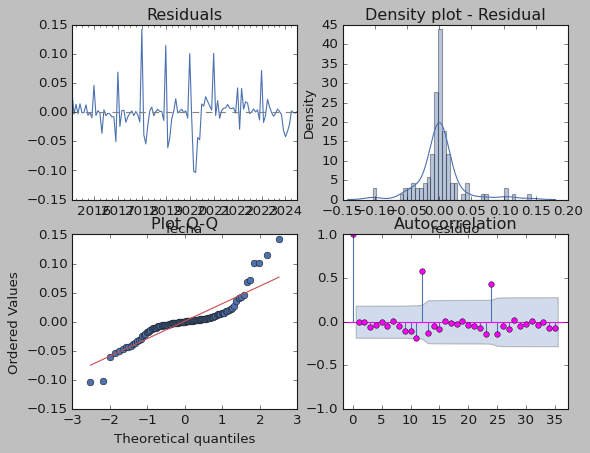

In [38]:
import scipy.stats as stats

residuales =pd.DataFrame(arima_fit.resid.iloc[1:], columns = ["residuo"])

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residuales["residuo"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");
axs[0,0].axhline(0, linestyle='--', color='gray')

# plot
sns.distplot(residuales["residuo"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residuales["residuo"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residuales["residuo"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

In [39]:
test

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion
fecha,,,,,
2024-08-01,152241.817,245914.856,0.619083,123.161211,104.447962
2024-09-01,167531.291,278295.798,0.601990,122.533632,100.265301
2024-10-01,184649.523,309378.372,0.596840,121.737019,139.942870
2024-11-01,200293.016,340501.920,0.588229,121.382277,153.769579
2024-12-01,213965.725,371764.424,0.575541,122.002070,201.492260
2025-01-01,17765.108,31512.543,0.563747,121.610549,196.001572
2025-02-01,36094.024,62261.270,0.579719,122.130957,397.075158
2025-03-01,49969.934,92521.398,0.540091,122.304846,397.531894
2025-04-01,67912.024,123740.864,0.548825,121.578018,370.660651


In [40]:
# forecast = arima.forecast(steps = 5)
forecast = arima_fit.forecast(steps = 12)
forecast

2024-08-01    0.622852
2024-09-01    0.622873
2024-10-01    0.622871
2024-11-01    0.622871
2024-12-01    0.622871
2025-01-01    0.622871
2025-02-01    0.622871
2025-03-01    0.622871
2025-04-01    0.622871
2025-05-01    0.622871
2025-06-01    0.622871
2025-07-01    0.622871
Freq: MS, Name: predicted_mean, dtype: float64

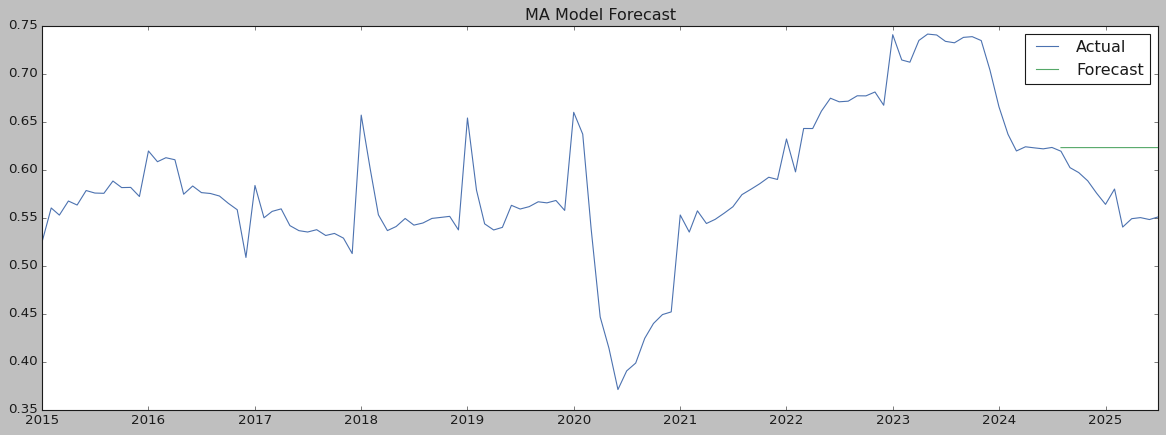

In [41]:
# plot forcasting
plt.figure(figsize=(18,6))
plt.plot(sini["tasa_siniestralidad"], label='Actual')
#plt.plot(weekly_venta_log[-90:], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('MA Model Forecast')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error

#  RMSE
arma_rmse1 = np.sqrt(mean_squared_error(test['tasa_siniestralidad'], forecast))

print(f'Modelo ARIMA RMSE: {arma_rmse1*100}')

Modelo ARIMA RMSE: 5.657292770078466


## `Modelo Sarima`

In [43]:
from pmdarima import auto_arima

# Ajustar modelo ARIMA estacional
modelo = auto_arima(
    train["tasa_siniestralidad"],
    seasonal = True,        # 🔑 Activar estacionalidad
    m = 12,                 # Periodo estacional (12 para mensual, 7 para semanal, etc.)
    stepwise=True,
    trace=True,
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-493.814, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-449.498, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-501.225, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-479.190, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-451.421, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-449.187, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-501.300, Time=0.77 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-498.787, Time=0.96 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-501.130, Time=0.60 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-499.806, Time=0.36 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-499.588, Time=1.07 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-499.505, Time=1.15 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-500.892, Time=0.67 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=-497.550, Time=1.31 sec
 ARIMA(1,1,0)(2,0,0

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model= SARIMAX(train['tasa_siniestralidad'], order = (1,1,0), seasonal_order = (2,0,0,12), )
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                tasa_siniestralidad   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(2, 0, 0, 12)   Log Likelihood                 255.646
Date:                            Sun, 24 Aug 2025   AIC                           -503.292
Time:                                    23:09:54   BIC                           -492.347
Sample:                                01-01-2015   HQIC                          -498.850
                                     - 07-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1854      0.067      2.749      0.006       0.053       0.318
ar.S.L12       0.5368      0.060   

In [45]:
sarima_forecast = sarima_fit.forecast(steps = 12)
sarima_forecast

2024-08-01    0.623333
2024-09-01    0.627359
2024-10-01    0.627784
2024-11-01    0.626181
2024-12-01    0.607722
2025-01-01    0.597660
2025-02-01    0.578543
2025-03-01    0.568884
2025-04-01    0.574461
2025-05-01    0.574810
2025-06-01    0.574116
2025-07-01    0.573951
Freq: MS, Name: predicted_mean, dtype: float64

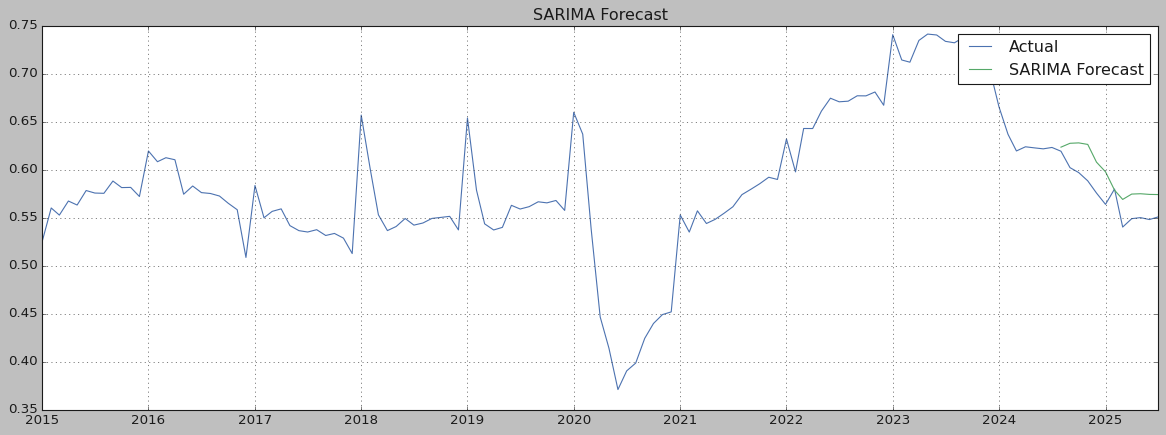

In [46]:
# plot forcast
plt.figure(figsize=(18,6))
plt.plot(sini["tasa_siniestralidad"], label='Actual')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

#  RMSE
arima_rmse2 = np.sqrt(mean_squared_error(test['tasa_siniestralidad'], sarima_forecast))

print(f'Modelo MA RMSE: {arima_rmse2}')

Modelo MA RMSE: 0.026736319449461407


## `Modelo SARIMAX`

In [48]:
data.columns

Index(['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy', 'Day', 'Month'],
      dtype='object')

In [49]:
sini2 = data[['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad','ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias', 'covid_dummy']]
sini2 = sini2.set_index('fecha')
sini2

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais,feriados_dias,covid_dummy
fecha,,,,,,,,
2015-01-01,11414.73670,21737.34840,0.525121,101.324349,304.830000,933.903226,1,0
2015-02-01,23993.22800,42846.63945,0.559979,102.423237,251.570000,778.035714,1,0
2015-03-01,36434.26000,65937.44000,0.552558,102.965220,400.650000,799.516129,0,0
2015-04-01,51390.63183,90600.17140,0.567224,104.718928,386.070000,782.733333,1,0
2015-05-01,65844.30084,116942.80600,0.563047,104.820214,352.840000,670.548387,1,0
...,...,...,...,...,...,...,...,...
2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894,1502.129032,1,0
2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651,1418.900000,1,0
2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194,1083.451613,1,0


In [50]:
sini2.columns

Index(['costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy'],
      dtype='object')

### `Interpretación del VIF`

El VIF indica cuánto aumenta la varianza de un coeficiente de regresión debido a la correlación 

con otras variables predictoras. Los umbrales comunes son:

$$\text{VIF}_j = \frac{1}{1 - R_{j}^2} $$

- VIF < 5: Sin multicolinealidad significativa.

- 5 < VIF < 10: Multicolinealidad moderada, tolerable en algunos casos.

- VIF > 10: Multicolinealidad alta, problemática para modelos lineales.


In [51]:
sini2.columns

Index(['costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy'],
      dtype='object')

In [52]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponiendo tus datos imputados (data_imputed del código anterior)
reduced_vars = [
 'prima_nrd', 'covid_dummy',
 'precipitacion', 'riesgo_pais', 'feriados_dias'
]
X_reduced = sini2[reduced_vars]

vif_reduced = pd.DataFrame()
vif_reduced['Variable'] = X_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("VIF con variables reducidas:")
print(vif_reduced)

VIF con variables reducidas:
        Variable       VIF
0      prima_nrd  2.812603
1    covid_dummy  1.526685
2  precipitacion  4.397568
3    riesgo_pais  4.326118
4  feriados_dias  3.052864


#### `Agregar rezagos`

In [53]:
num_lags = 5
for lag in range(1, num_lags + 1):
    sini2[f'lag{lag}'] = sini2['costo_siniestros'].shift(lag)

#sini2.dropna(inplace = True)


### `Agregar promedios moviles`

In [54]:
# Lista de tamaños de ventana
windows = [2, 3, 4]

# Calcular promedios móviles para cada tamaño de ventana
for window in windows:
    sini2[f'moving_average_{window}'] = sini2['tasa_siniestralidad'].rolling(window=window).mean()

sini2.dropna(inplace = True)

# Mostrar el DataFrame con los promedios móviles
sini2

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais,feriados_dias,covid_dummy,lag1,lag2,lag3,lag4,lag5,moving_average_2,moving_average_3,moving_average_4
fecha,,,,,,,,,,,,,,,,
2015-06-01,83036.26387,143623.61610,0.578152,105.747636,278.020000,776.533333,0,0,65844.30084,51390.63183,36434.26000,23993.22800,11414.73670,0.570599,0.569474,0.565245
2015-07-01,98594.82518,171312.58197,0.575526,105.208120,273.590000,899.903226,0,0,83036.26387,65844.30084,51390.63183,36434.26000,23993.22800,0.576839,0.572242,0.570987
2015-08-01,115092.52825,200072.68660,0.575254,105.388957,165.800000,1163.806452,1,0,98594.82518,83036.26387,65844.30084,51390.63183,36434.26000,0.575390,0.576310,0.572995
2015-09-01,133338.83454,226748.35339,0.588048,105.656150,141.760000,1342.300000,0,0,115092.52825,98594.82518,83036.26387,65844.30084,51390.63183,0.581651,0.579609,0.579245
2015-10-01,149738.11301,257628.78179,0.581217,105.639544,252.510000,1334.193548,1,0,133338.83454,115092.52825,98594.82518,83036.26387,65844.30084,0.584632,0.581506,0.580011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894,1502.129032,1,0,36094.02400,17765.10800,213965.72500,200293.01600,184649.52300,0.559905,0.561185,0.564774
2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651,1418.900000,1,0,49969.93400,36094.02400,17765.10800,213965.72500,200293.01600,0.544458,0.556211,0.558095
2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194,1083.451613,1,0,67912.02400,49969.93400,36094.02400,17765.10800,213965.72500,0.549386,0.546287,0.554645


In [55]:
train2 = sini2[sini2.index<= '2024-07-01'] 
test2 = sini2[sini2.index>'2024-07-01'] 

train2.shape, test2.shape

((110, 16), (12, 16))

In [56]:
sini2.columns

Index(['costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'moving_average_2', 'moving_average_3', 'moving_average_4'],
      dtype='object')

'costo_siniestros', 'lag1',  'moving_average_2',

In [57]:
sarimax_model = SARIMAX(train2['tasa_siniestralidad'], 
                       exog = train2[['costo_siniestros', 'precipitacion', 'riesgo_pais',  'moving_average_2', 'lag1', 'moving_average_3', 'moving_average_4']], # variable exogena
                        order = (0,1,1),  # parte no estacional
                       seasonal_order = (0,1,0,12)) # SMA(12) con periodo 52



# Entrenar el modelo
sarimax_fit = sarimax_model.fit()

# Mostrar el resumen del Modelo

print(sarimax_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 tasa_siniestralidad   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 294.217
Date:                             Sun, 24 Aug 2025   AIC                           -570.433
Time:                                     23:09:55   BIC                           -547.261
Sample:                                 06-01-2015   HQIC                          -561.064
                                      - 07-01-2024                                         
Covariance Type:                               opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
costo_siniestros  3.562e-07   9.78e-08      3.641      0.000    1.64e-07    5.48e-07
precipita

prima_nrd', 'precipitacion', 'lag1', 'moving_average_2',

In [58]:
# Forecast
#sarmax_pred = sarma_fit.forecast(steps=len(test), exog = test[["checkout_price", 'base_price']])
sarimax_pred = sarimax_fit.predict(start = "2024-08-01", end = "2025-07-01" , 
                                   exog = test2[['costo_siniestros', 'precipitacion', 'riesgo_pais',  'moving_average_2', 'lag1', 'moving_average_3', 'moving_average_4']])
sarimax_pred

2024-08-01    0.625467
2024-09-01    0.616238
2024-10-01    0.602582
2024-11-01    0.597414
2024-12-01    0.574985
2025-01-01    0.578795
2025-02-01    0.571808
2025-03-01    0.563922
2025-04-01    0.554134
2025-05-01    0.550982
2025-06-01    0.550738
2025-07-01    0.557105
Freq: MS, Name: predicted_mean, dtype: float64

In [59]:
from sklearn.metrics import mean_absolute_percentage_error

In [60]:
sarimax_rmse = np.sqrt(mean_squared_error(test['tasa_siniestralidad'], sarimax_pred))
print(f'SARIMAX RMSE: {sarimax_rmse}')

SARIMAX RMSE: 0.010394888802088591


In [61]:
# Cálculo del MAPE
sarimax_mape = mean_absolute_percentage_error(test['tasa_siniestralidad'], sarimax_pred) * 100
print(f'SARIMAX MAPE: {sarimax_mape}')

SARIMAX MAPE: 1.4414694728173778


si el error de la industria de la aseguradora de auto sinestrado es 1.79% a 2.0%

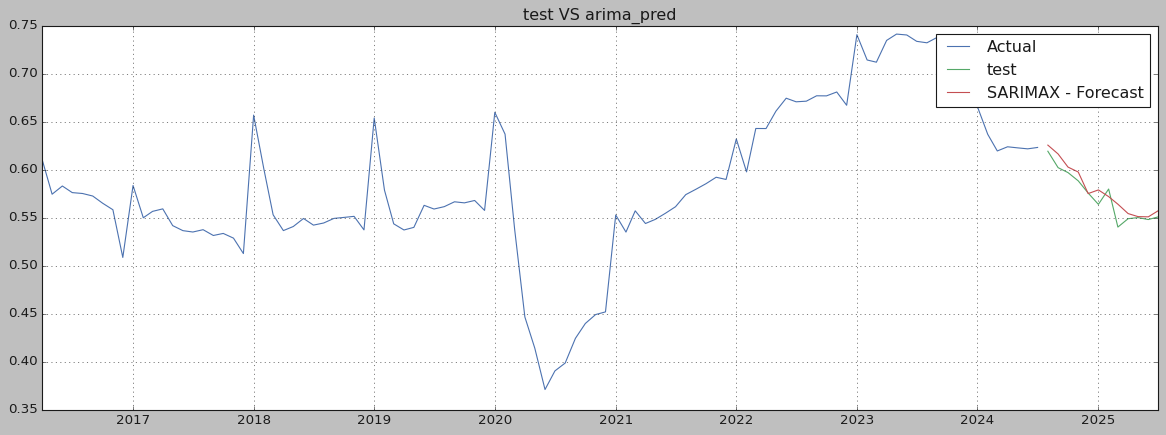

In [62]:
plt.figure(figsize=(18,6))
plt.plot(train['tasa_siniestralidad'][-100:], label='Actual')
plt.plot(test['tasa_siniestralidad'], label='test')
plt.plot(sarimax_pred, label='SARIMAX - Forecast')
#plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('test VS arima_pred')
plt.grid()
plt.legend()
plt.show()

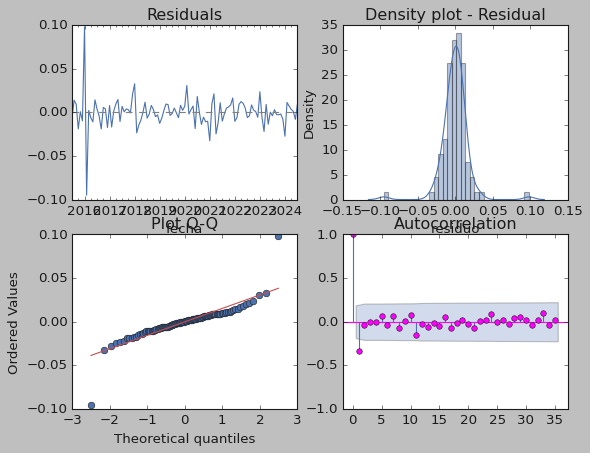

In [63]:
import scipy.stats as stats

residuales_smax =pd.DataFrame(sarimax_fit.resid.iloc[1:], columns = ["residuo"])

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residuales_smax["residuo"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");
axs[0,0].axhline(0, linestyle='--', color='gray')

# plot
sns.distplot(residuales_smax["residuo"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residuales_smax["residuo"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residuales_smax["residuo"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

## `Modelos de ML`

In [64]:
df = data.copy()
df = df.rename({"fecha": "ds", "tasa_siniestralidad": "y"}, axis = 1)
df["unique_id"] = "tasa_siniestralidad"
df

,ds,costo_siniestros,prima_nrd,y,ipc_transporte,precipitacion,riesgo_pais,feriados_dias,covid_dummy,Day,Month,unique_id
0,2015-01-01,11414.73670,21737.34840,0.525121,101.324349,304.830000,933.903226,1,0,Thursday,January,tasa_siniestralidad
1,2015-02-01,23993.22800,42846.63945,0.559979,102.423237,251.570000,778.035714,1,0,Sunday,February,tasa_siniestralidad
2,2015-03-01,36434.26000,65937.44000,0.552558,102.965220,400.650000,799.516129,0,0,Sunday,March,tasa_siniestralidad
3,2015-04-01,51390.63183,90600.17140,0.567224,104.718928,386.070000,782.733333,1,0,Wednesday,April,tasa_siniestralidad
4,2015-05-01,65844.30084,116942.80600,0.563047,104.820214,352.840000,670.548387,1,0,Friday,May,tasa_siniestralidad
...,...,...,...,...,...,...,...,...,...,...,...,...
122,2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894,1502.129032,1,0,Saturday,March,tasa_siniestralidad
123,2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651,1418.900000,1,0,Tuesday,April,tasa_siniestralidad
124,2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194,1083.451613,1,0,Thursday,May,tasa_siniestralidad
125,2025-06-01,102555.13100,187168.38900,0.547930,120.943609,188.859993,896.833333,0,0,Sunday,June,tasa_siniestralidad


In [65]:
train = df[df["ds"]<= '2024-07-01'] 
test = df[df["ds"] >'2024-07-01'] 

train.shape, test.shape

((115, 12), (12, 12))

In [66]:
# Utils
# ==============================================================================
from utilsforecast.plotting import plot_series
from utilsforecast.preprocessing import fill_gaps
from functools import partial
from utilsforecast.feature_engineering import fourier, trend, time_features
from utilsforecast.feature_engineering import pipeline
from utilsforecast.feature_engineering import future_exog_to_historic

ModuleNotFoundError: No module named 'utilsforecast'

In [ ]:
# Sklearn model y metricas
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

from mlforecast.target_transforms import LocalRobustScaler, LocalStandardScaler
from mlforecast.lag_transforms import RollingMean, ExpandingStd
import operator

# Mlforecast
# ==============================================================================
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from mlforecast.lag_transforms import Combine

In [ ]:
model1 = {
    'lr':LinearRegression(),
    "rf": RandomForestRegressor(n_estimators= 500, max_depth= 5, n_jobs= -1),
    'xgb': XGBRegressor(n_estimators = 500,       # Número de árboles (más árboles = mejor ajuste)
                        max_depth = 5,            # Profundidad de los árboles (mayor profundidad captura más patrones)
                        ),
    "dt": DecisionTreeRegressor(),
}

In [ ]:
mlf1 = MLForecast(models = model1,
                 freq = 'MS', 
                 lags = range(1, 5, 1),
                 target_transforms= [Differences([12]), LocalStandardScaler()], # LocalRobustScaler(scale='iqr')  Differences([1]), LocalStandardScaler()
                 date_features=["year", "month", "day"], # Estacionalidad
                 
                 num_threads = 32
                 ) 

In [ ]:
mlf1.preprocess(train, static_features= [])

In [ ]:
# fit the models
mlf1.fit(train, fitted = True, static_features= [],
prediction_intervals=PredictionIntervals(n_windows = 5, h = 12, method="conformal_distribution"))

In [ ]:
forecast1 = mlf1.predict(h = 12, level=[80,95], X_df= test) 

forecast1.tail()

In [ ]:
plot_series(df, forecast1,  max_insample_length = 100, )

In [ ]:
cv1 = mlf1.cross_validation(
    train, static_features= [],
    n_windows = 5,  # number of models to train/splits to perform
    h = 12,  
)
cv1.tail()

In [ ]:
from utilsforecast.losses import mse, mae, rmse

def evaluate_cv(df, metric):
    models = df.columns.drop(['unique_id', 'ds', 'y', 'cutoff']).tolist()
    evals = metric(df, models=models)
    evals['best_model'] = evals[models].idxmin(axis=1)
    return evals

In [ ]:
evaluate_cv(cv1, rmse)

In [ ]:
plot_series(df, forecast1,  max_insample_length = 300, models = ["rf"],)

In [ ]:
plot_series(df, forecast1,  max_insample_length = 100, models = ["rf"], level = [80, 95])